In [20]:
import pandas as pd
import numpy as np

In [21]:
pip install japanize-matplotlib

In [22]:
import japanize_matplotlib

In [23]:
df = pd.read_csv('/content/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.003180
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.000405
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.000927
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.001538
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.001097


In [24]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.003180
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.000405
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.000927
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.001538
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.001097


array([[<Axes: title={'center': '所得'}>, <Axes: title={'center': '築年数'}>,
        <Axes: title={'center': '地域人口'}>],
       [<Axes: title={'center': '緯度'}>, <Axes: title={'center': '経度'}>,
        <Axes: title={'center': '住宅価格'}>],
       [<Axes: title={'center': '部屋数/人'}>,
        <Axes: title={'center': '寝室数/人'}>, <Axes: >]], dtype=object)

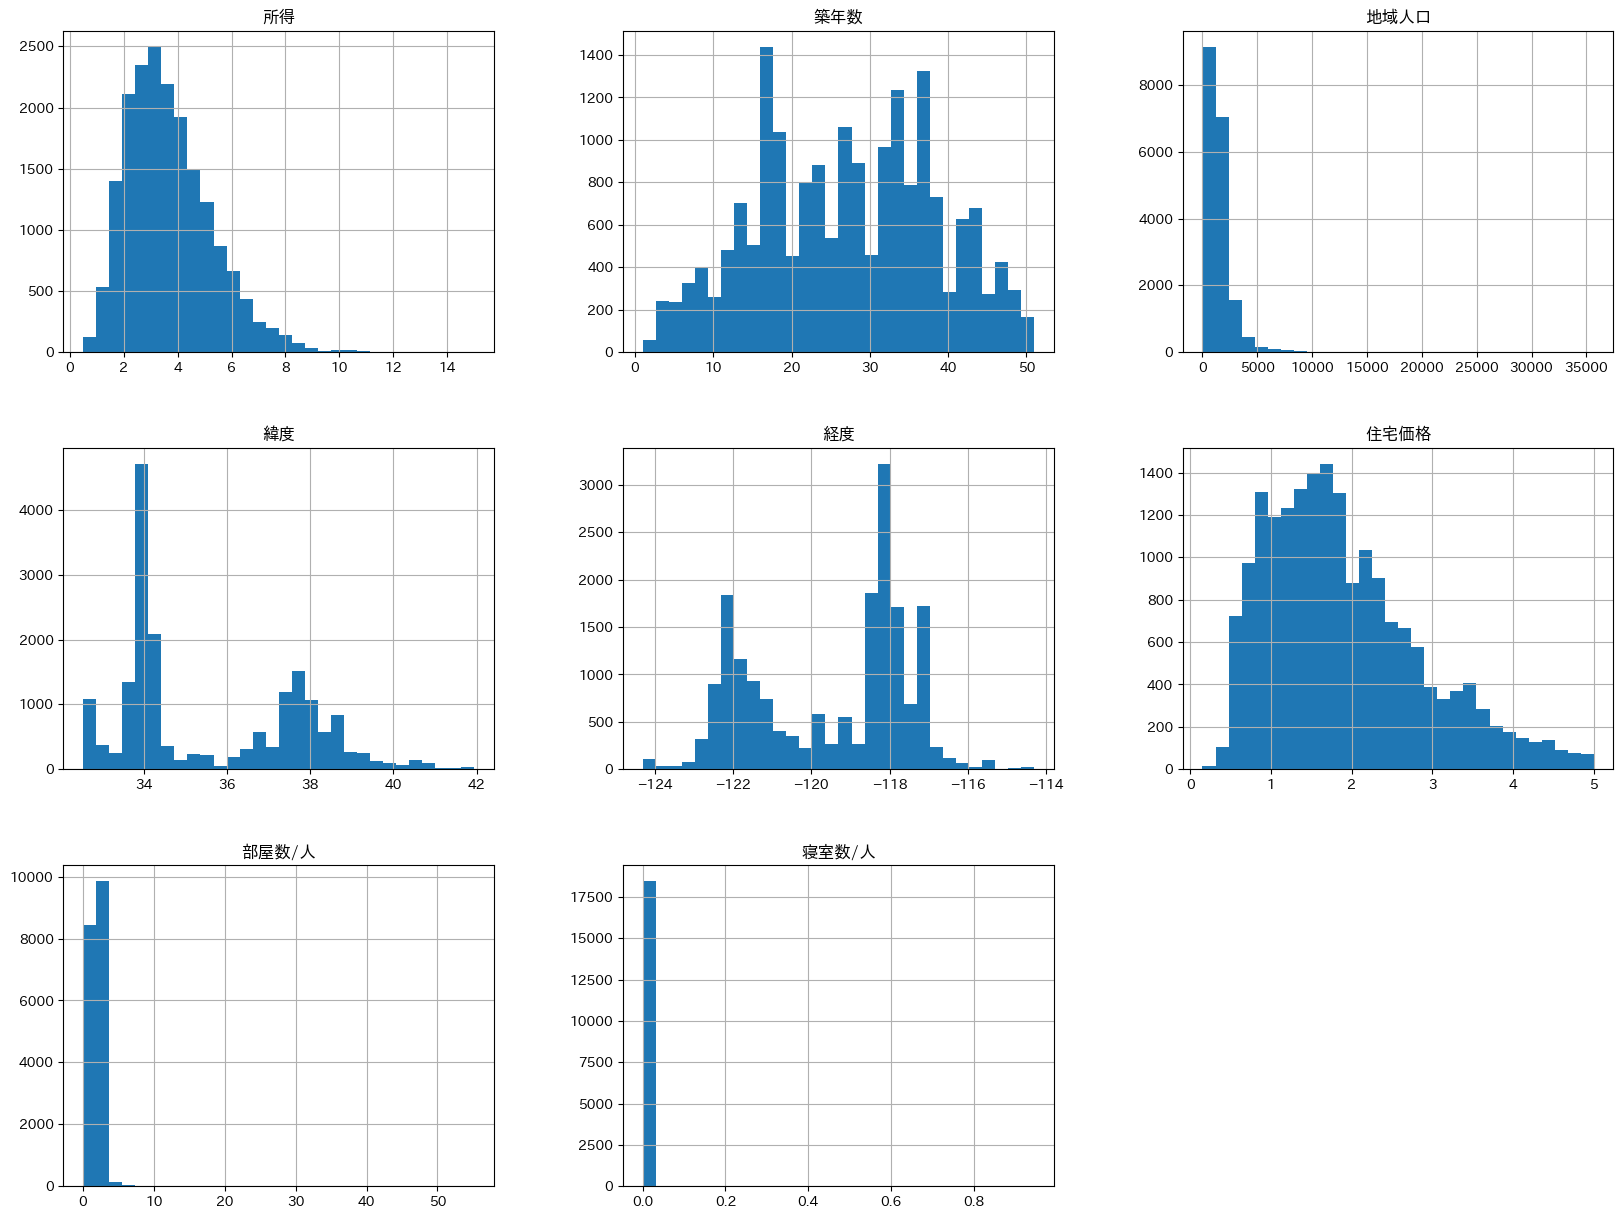

In [25]:
df.hist(figsize=(20, 15), bins=30)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18572 entries, 0 to 18571
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   所得      18572 non-null  float64
 1   築年数     18572 non-null  float64
 2   地域人口    18572 non-null  float64
 3   緯度      18572 non-null  float64
 4   経度      18572 non-null  float64
 5   住宅価格    18572 non-null  float64
 6   部屋数/人   18572 non-null  float64
 7   寝室数/人   18572 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [27]:
X = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13000, 7) (5572, 7) (13000,) (5572,)


In [31]:
# 決定木のimport
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

# クラス0, 1を作成する
threshold = y_train.mean()
y_train_classified = np.where(y_train >= threshold, 1, 0)
y_test_classfied = np.where(y_test >= threshold, 1, 0)

In [33]:
model.fit(X_train, y_train_classified)

DecisionTreeClassifier(random_state=0)

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [35]:
y_test

array([0.878, 2.25 , 2.256, ..., 2.369, 3.021, 2.404])

In [37]:
from sklearn.metrics import classification_report

# y_testを二値化
threshold = y_train.mean()
y_test_classified = np.where(y_test >= threshold, 1, 0)

print(classification_report(y_test_classified, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3251
           1       0.82      0.83      0.82      2321

    accuracy                           0.85      5572
   macro avg       0.85      0.85      0.85      5572
weighted avg       0.85      0.85      0.85      5572

